In [ ]:
# import libraries

import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf


In [ ]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

Using TensorFlow backend.


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving train.csv to train.csv
User uploaded file "train.csv" with length 1959156 bytes


In [ ]:
df=pd.read_csv('train.csv')                     # Read csv file

In [ ]:
df.head()     

,Review Text,Review Title,topic
0,"Did nothing for me, didn't help lost even with...",Useless,Shipment and delivery
1,"Did nothing for me, didn't help lost even with...",Useless,Not Effective
2,I have bought these bags and immediately open...,TRASH!!! Do not buy these bags it’s a waist of...,Customer Service
3,Gave me an allergic reaction on my face :(,Do not recommend,Allergic
4,These don't compare to the name brand wipes. F...,Can't tackle big messes,Texture


In [ ]:
df.columns

Index(['Review Text', 'Review Title', 'topic'], dtype='object')

In [ ]:
colname=['Review Text', 'Review Title', 'topic']


In [ ]:
df.describe()

df['topicMO']=''

In [ ]:
 df.isnull().sum(axis = 0)     # check null value present in columns

Review Text     0
Review Title    0
topic           0
topicMO         0
dtype: int64

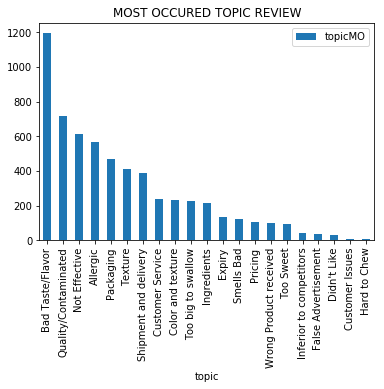

In [ ]:
df1=df[['topic','topicMO']].groupby(['topic']).count()
df1=df1.sort_values(['topicMO'],ascending=False)
df1.plot(kind='bar', title='MOST OCCURED TOPIC REVIEW')


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
%matplotlib inline

'''
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
'''

df['Review Text']=df['Review Text'].str.lower()
nltk.download('punkt')


def identify_tokens(row):
    review = row['Review Text']
    tokens = nltk.word_tokenize(review)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

df['Review Text'] = df.apply(identify_tokens, axis=1)

from nltk.stem import PorterStemmer
stemming = PorterStemmer()
def stem_list(row):
    my_list = row['Review Text']
    stemmed_list = [stemming.stem(word) for word in my_list]
    return (stemmed_list)

df['Review Text'] = df.apply(stem_list, axis=1)

from nltk.corpus import stopwords
stops = set(stopwords.words("english"))

def remove_stops(row):
    my_list = row['Review Text']
    meaningful_words = [w for w in my_list if not w in stops]
    return (meaningful_words)

df['Review Text'] = df.apply(remove_stops, axis=1)

def rejoin_words(row):
    my_list = row['Review Text']
    joined_words = ( " ".join(my_list))
    return joined_words

df['Review Text'] = df.apply(rejoin_words, axis=1)




'''   
df['Review Text'] = df['Review Text'].apply(clean_text)
df['Review Title']= df['Review Title'].apply(clean_text)
df['topic']=df['topic'].apply(clean_text)

'''

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


"   \ndf['Review Text'] = df['Review Text'].apply(clean_text)\ndf['Review Title']= df['Review Title'].apply(clean_text)\ndf['topic']=df['topic'].apply(clean_text)\n\n"

In [ ]:
X = df['Review Text']
y = df['topic']
X

0       noth didnt help lost even work eat healthi did...
1       noth didnt help lost even work eat healthi did...
2       bought bag immedi open one put trash bag split...
3                               gave allerg reaction face
4       dont compar name brand wipe famili littl kid u...
5       dont compar name brand wipe famili littl kid u...
6       dont compar name brand wipe famili littl kid u...
7                                                    good
8       extrem hard swallow pill huge side sharp serio...
9       first style leav review solimo incontin maximu...
10      first style leav review solimo incontin maximu...
11      first style leav review solimo incontin maximu...
12      smell horribl soon open bottl hit smell ammoni...
13      super easi dont work definit doesnt give energ...
14      super easi dont work definit doesnt give energ...
15      light big disappoint find good veggi vitamin i...
16      light big disappoint find good veggi vitamin i...
17            

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7,random_state=42)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.cluster import KMeans

from sklearn.ensemble import RandomForestClassifier

text_clf = Pipeline([('vect', CountVectorizer(stop_words='english')),
                    ('tfidf', TfidfTransformer()),
                    ('clf', MultinomialNB()  )])


In [ ]:
text_clf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
predicted = text_clf.predict(X_test)

In [ ]:
results = accuracy_score(y_test, predicted)
results

0.3068072866730585

In [ ]:
df['Review Text'].



0       nothing didnt help lost even working eating he...
1       nothing didnt help lost even working eating he...
2       bought bags immediately open one put trash bag...
3                             gave allergic reaction face
4       dont compare name brand wipes family 5 little ...
5       dont compare name brand wipes family 5 little ...
6       dont compare name brand wipes family 5 little ...
7                                                    good
8       extremely hard swallow pills huge sides sharp ...
9       first style leaving review solimo incontinent ...
10      first style leaving review solimo incontinent ...
11      first style leaving review solimo incontinent ...
12      smelled horrible soon opened bottle hit smell ...
13      super easy dont work definitely doesnt give en...
14      super easy dont work definitely doesnt give en...
15      lights big disappointment finding good veggie ...
16      lights big disappointment finding good veggie ...
17            